In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings("ignore")


In [32]:
from sklearn.datasets import load_wine
wine = load_wine()

In [33]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [34]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

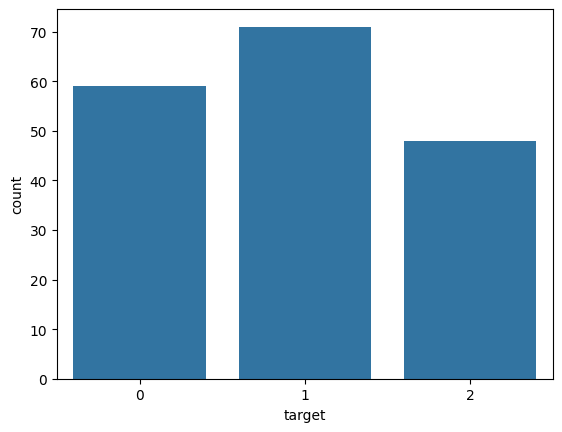

In [35]:
sns.barplot(df['target'].value_counts()) # 0 = first cultivar ,2 = Second cultivar, 3 = third cultivar

In [36]:
data0 = df[df['target'] == 0]
data1 = df[df['target'] == 1]
data2 = df[df['target'] == 2]

<Axes: xlabel='flavanoids', ylabel='total_phenols'>

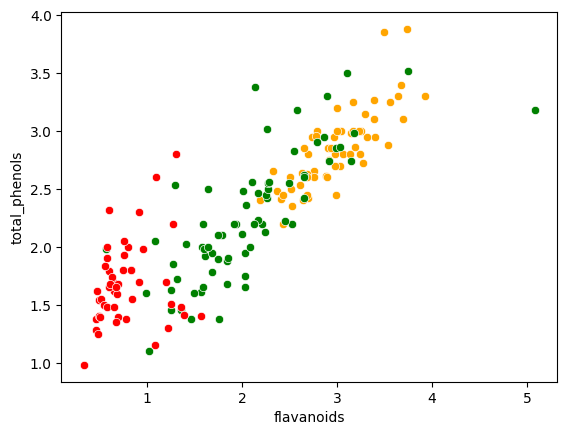

In [37]:
sns.scatterplot(x=data0['flavanoids'],y=data0['total_phenols'],color='orange')
sns.scatterplot(x=data1['flavanoids'],y=data1['total_phenols'],color='green')
sns.scatterplot(x=data2['flavanoids'],y=data2['total_phenols'],color='red')

In [38]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [39]:
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0,0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0


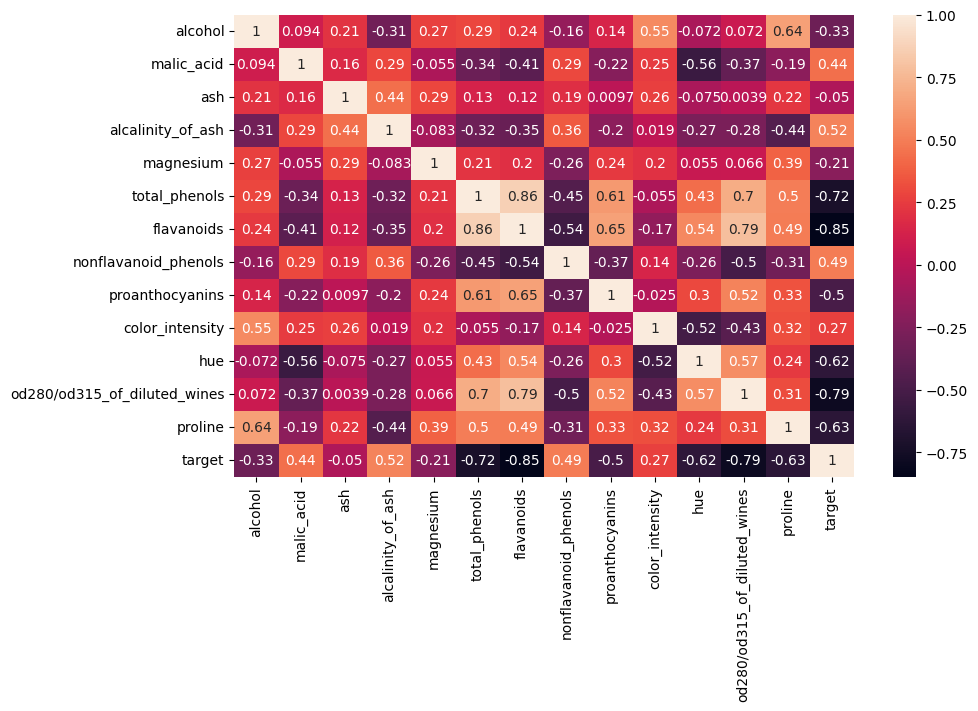

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [41]:
df.shape

(178, 14)

In [43]:
X = df.drop(columns=['target'],axis=1)
y = df['target']

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [45]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(142, 13) (142,) (36, 13) (36,)


#### Model Selection

In [71]:

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [48]:
def train_model(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train,y_train)
        
        # Evaluate the model on the validation set
        accuracy = model.score(X_test, y_test)
        
        print(f'Accuracy % of {model.__class__.__name__}: {accuracy}')
        print('----------------------------------------------')


# Define the list of models
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Train and evaluate the models
train_model(models, X_train, y_train,X_test,y_test)

Accuracy % of GaussianNB: 0.9722222222222222
----------------------------------------------
Accuracy % of MultinomialNB: 0.8888888888888888
----------------------------------------------
Accuracy % of BernoulliNB: 0.3888888888888889
----------------------------------------------


In [56]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'priors': [None, [0.25, 0.75], [0.3, 0.7]],  # Prior probabilities of the classes
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Portion of the largest variance of all features
}
GaussianNB = GaussianNB()
grid_search = GridSearchCV(GaussianNB, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'priors': None, 'var_smoothing': 1e-09}
Best Cross-Validation Score: 0.97


In [64]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

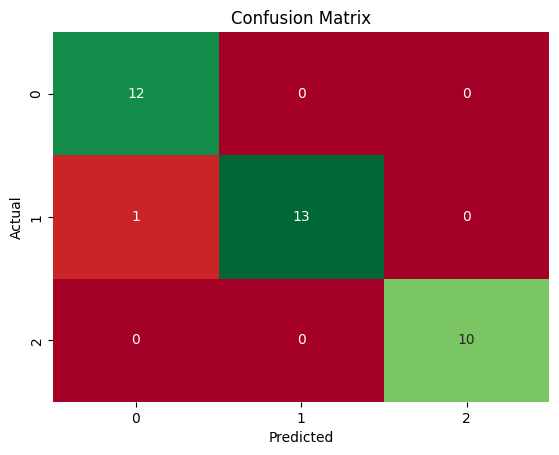

In [65]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_true = y_test
precision = precision_score(y_true, y_pred, pos_label='spam',average='micro')
recall = recall_score(y_true, y_pred, pos_label='spam',average='micro')
f1 = f1_score(y_true, y_pred, pos_label='spam',average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) # F1 score should be 0.7 or higher to beed termed as good

Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222


In [69]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5]
}
MultinomialNB = MultinomialNB()
grid_search = GridSearchCV(MultinomialNB, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'alpha': 0.1}
Best Cross-Validation Score: 0.85


In [72]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

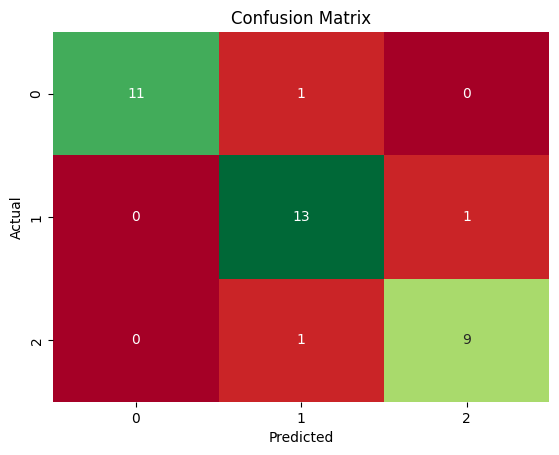

In [73]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_true = y_test
precision = precision_score(y_true, y_pred, pos_label='spam',average='micro')
recall = recall_score(y_true, y_pred, pos_label='spam',average='micro')
f1 = f1_score(y_true, y_pred, pos_label='spam',average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) # F1 score should be 0.7 or higher to beed termed as good

Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1 Score: 0.9166666666666666
